In [1]:
import random, doctest, itertools, json
import numpy as np
from more_itertools import take
from datetime import datetime, timedelta
from typing import NamedTuple, Optional, Dict, Iterable, Callable

from mock_data import versions, timestamps, datestamps, asympt_approaching_1, Point, datestamped_points, versioned_points


teams = ['echo', 'foxtrot', 'lima']
classifiers = ['random-forest', 'cnn-gamma', 'cnn-eta']

In [2]:
param_combs = list(itertools.product(
    [2, 1, 5],
    [0.04, 0.02, 0.05],
))
teams_classifiers = list(itertools.product(teams, classifiers))

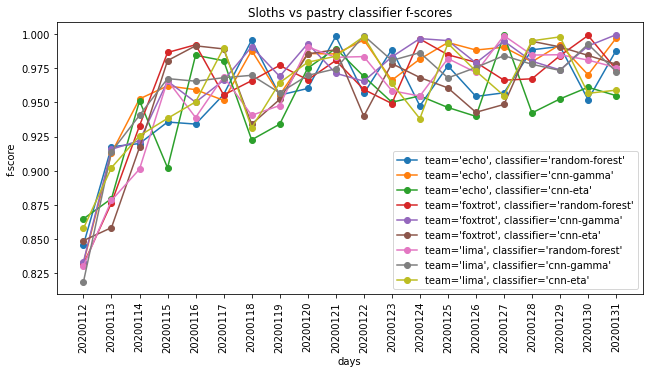

In [3]:
from IPython.display import Image, HTML
from matplotlib import pyplot as plt

plt.clf()
plt.gcf().set_size_inches(10.5, 5)

for (asp, jitter), (team, classifier) in zip(param_combs, teams_classifiers):
    points = take(20, versioned_points(
        asympt_approaching_1(asp, jitter, shift=0.6), 
        timestamps(),
        delays=itertools.repeat(timedelta(minutes=15)),
        versions=versions(),
        params={'team': team, 'classifier': classifier}))
    
    xs = [p.timestamp.strftime("%Y%m%d") for p in points]
    ys = [p.value for p in points]
    
    
    plt.plot(xs, ys, label=f'{team=}, {classifier=}', marker="o")  # Plot some data on the (implicit) axes.
    plt.xlabel('days')
    plt.ylabel('f-score')
    plt.title("Sloths vs pastry classifier f-scores")
    plt.legend()
    plt.xticks(xs, xs, rotation='vertical')

<img src="https://img-9gag-fun.9cache.com/photo/aW6oA1n_460swp.webp" width="400" height="400" align="center"/>

In [4]:
flatten = itertools.chain.from_iterable
sloths_pastry_points = list(flatten(
    take(20, versioned_points(
        asympt_approaching_1(asp, jitter, shift), 
        timestamps(),
        itertools.repeat(timedelta(minutes=15)),
        versions=versions(),
        params={'team': team, 'classifier': classifier}))
    for asp, jitter in param_combs
    for team, classifier in teams_classifiers
))

NameError: name 'shift' is not defined

In [5]:
sloths_json = json.dumps([p.json_dict() for p in sloths_pastry_points], indent=2, sort_keys=True)

NameError: name 'sloths_pastry_points' is not defined

In [6]:
with open("sloth_pastry_classifiers.json", "w") as f:
    f.write(sloths_json)
print('\n'.join(sloths_json.splitlines()[:10]))

NameError: name 'sloths_json' is not defined

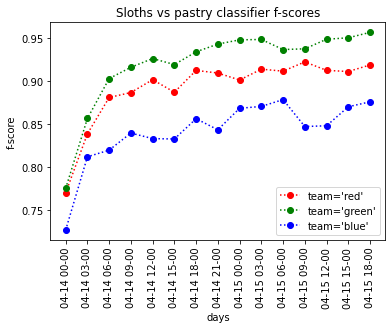

In [7]:
dogs_muffins_params = [
    # asp, jitter, team, shift, vertical_scale
    (2.0, 0.015, "red", 0.55, 0.93),
    (1.5, 0.010, "green", 0.1, 0.96),
    (3.0, 0.025, "blue", 0.65, 0.88),
] 
plt.clf()
    
for asp, jitter, team, horizontal_shift, vertical_scale in dogs_muffins_params:  
    points = take(15, versioned_points(
        map(lambda x: x * vertical_scale, asympt_approaching_1(asp, jitter, horizontal_shift)), 
        timestamps(datetime(2012, 4, 14), time_step=timedelta(hours=3)),
        delays=itertools.cycle(timedelta(minutes=m) for m in [2, 4, 19]),
        versions=versions(),
        params={'team': team}))
    
    xs = [p.timestamp.strftime("%m-%d %H-%M") for p in points]
    ys = [p.value for p in points]
    
    
    plt.plot(xs, ys, label=f'{team=}', marker="o", color=team, linestyle=":")  # Plot some data on the (implicit) axes.
    plt.xlabel('days')
    plt.ylabel('f-score')
    plt.title("Sloths vs pastry classifier f-scores")
    plt.legend()
    plt.xticks(xs, xs, rotation='vertical')

<img src="https://cdn-media-1.freecodecamp.org/images/1*bt-E2YcPafjiPbZFDMMmNQ.jpeg" width="400" height="400" align="center"/>

In [8]:
dogs_muffins_points = list(flatten(
    take(15, versioned_points(
        map(lambda x: x * vertical_scale, asympt_approaching_1(asp, jitter, horizontal_shift)), 
        timestamps(datetime(2012, 4, 14), time_step=timedelta(hours=3)),
        delays=itertools.cycle(timedelta(minutes=m) for m in [2, 4, 19]),
        versions=versions(),
        params={'team': team}))
    for asp, jitter, team, horizontal_shift, vertical_scale in dogs_muffins_params
))

In [9]:
dogs_json = json.dumps([p.json_dict() for p in dogs_muffins_points], indent=2, sort_keys=True)
with open("dogs_muffins_classifiers.json", "w") as f:
    f.write(dogs_json)
print('\n'.join(dogs_json.splitlines()[:10]))

[
  {
    "params": {
      "team": "red"
    },
    "posted_ts": "2012-04-14T00:02:00",
    "timestamp": "2012-04-14T00:00:00",
    "value": 0.7572272314092702,
    "version": "0.0.0"
  },
